#### Batch size of 1 (Stochastic Gradient Descent)

## weight decay hyperparameter tuning 
Common values for weight decay hyperparameter can range from 0.0001 to 0.1. However, the optimal value of weight decay is typically found through experimentation, and it can vary widely depending on the specific task and dataset

### Checkpoint 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

- model1's weight decay = 1e-06, batch size = 80 (original model)
- model2's weight decay = 1e-02
- model3's batch size = 1 (stochastic gradient descent)
- model4's batch size = 30 
- model5's batch size = 50 


In [ ]:
model1 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": False,
 "model_name": "efficientnet-b3",
 "pretrained": True,
 "finetune": 0,
 "label_weighted": True,
 "weight_by_detection_conf": False,
 "epochs": 50,
 "batch_size": 80,
 "lr": 3e-05,
 "weight_decay": 1e-06,
 "num_workers": 4,
 "logdir": ".",
 "log_extreme_examples": 0,
 "seed": 1176
}

In [ ]:
model2 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": false,
 "model_name": "efficientnet-b3",
 "pretrained": true,
 "finetune": 0,
 "label_weighted": true,
 "weight_by_detection_conf": false,
 "epochs": 50,
 "batch_size": 80,
 "lr": 3e-05,
 "weight_decay": 0.01,
 "num_workers": 4,
 "logdir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch-size80",
 "log_extreme_examples": 3,
 "seed": 7098
}

In [ ]:
model3 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": false,
 "model_name": "efficientnet-b3",
 "pretrained": true,
 "finetune": 0,
 "label_weighted": true,
 "weight_by_detection_conf": false,
 "epochs": 60,
 "batch_size": 1,
 "lr": 3e-05,
 "weight_decay": 1e-06,
 "num_workers": 4,
 "logdir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/1",
 "log_extreme_examples": 3,
 "seed": 5478
}

In [ ]:
model4 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": false,
 "model_name": "efficientnet-b3",
 "pretrained": true,
 "finetune": 0,
 "label_weighted": true,
 "weight_by_detection_conf": false,
 "epochs": 50,
 "batch_size": 30,
 "lr": 3e-05,
 "weight_decay": 1e-06,
 "num_workers": 4,
 "logdir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60",
 "log_extreme_examples": 3,
 "seed": 2844
}

In [ ]:
model5 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": false,
 "model_name": "efficientnet-b3",
 "pretrained": true,
 "finetune": 0,
 "label_weighted": true,
 "weight_by_detection_conf": false,
 "epochs": 50,
 "batch_size": 50,
 "lr": 3e-05,
 "weight_decay": 0.0001,
 "num_workers": 4,
 "logdir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60",
 "log_extreme_examples": 3,
 "seed": 5878
}

In [ ]:
df_model1 = np.load("/home/wliao14/animl-implement/result/0222/20230222_021024/confusion_matrices.npz")
df_model1_train, df_model1_val, df_model1_test = df_model1['train'], df_model1['val'], df_model1['test']

# read in the data 
df_model2 = np.load("/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch-size80/20230306_200710/confusion_matrices.npz")
df_model2_train, df_model2_val, df_model2_test = df_model2['train'], df_model2['val'], df_model2['test']

df_model3 = np.load("/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/1/20230301_034813/confusion_matrices.npz")
df_model3_train, df_model3_val, df_model3_test = df_model3['train'], df_model3['val'], df_model3['test']

df_model4 = np.load("/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60/20230301_005312/confusion_matrices.npz")
df_model4_train, df_model4_val, df_model4_test = df_model4['train'], df_model4['val'], df_model4['test']

df_model5 = np.load("/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60/20230228_234620/confusion_matrices.npz")
df_model5_train, df_model5_val, df_model5_test = df_model5['train'], df_model5['val'], df_model5['test']

In [ ]:
# calculate the precision and recall for each class 
confusion_matrix = df_model2_val

precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1)
fpr = np.sum(confusion_matrix, axis = 0) - np.diag(confusion_matrix)
fpr = fpr / np.sum(confusion_matrix, axis = 0)
fpr = 1 - fpr
f1 = 2 * (precision * recall) / (precision + recall)
f1

array([0.77440567, 0.8399546 , 0.91204819, 0.8722063 , 0.86127168])

In [ ]:
def precision_recall(confusion_matrix):
    # precision = tp / (tp + fp)
    # recall = tp / (tp + fn)
    # f1 = 2 * (precision * recall) / (precision + recall)
    # https://en.wikipedia.org/wiki/Precision_and_recall
    # https://en.wikipedia.org/wiki/F1_score
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)  # true positive rate = tp / (tp + fp) <- precision
    TP_rate = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1) # true positive rate = tp / (tp + fn) <- recall
    FP_rate = np.sum(confusion_matrix, axis = 0) - np.diag(confusion_matrix)
    FP_rate = FP_rate / np.sum(confusion_matrix, axis = 0)
    FP_rate = 1 - FP_rate
    FN_rate = 1 - TP_rate
    f1 = 2 * (precision * TP_rate) / (precision + TP_rate) # f1 = 2 * (precision * recall) / (precision + recall)
    return precision, TP_rate, FP_rate, f1, FN_rate

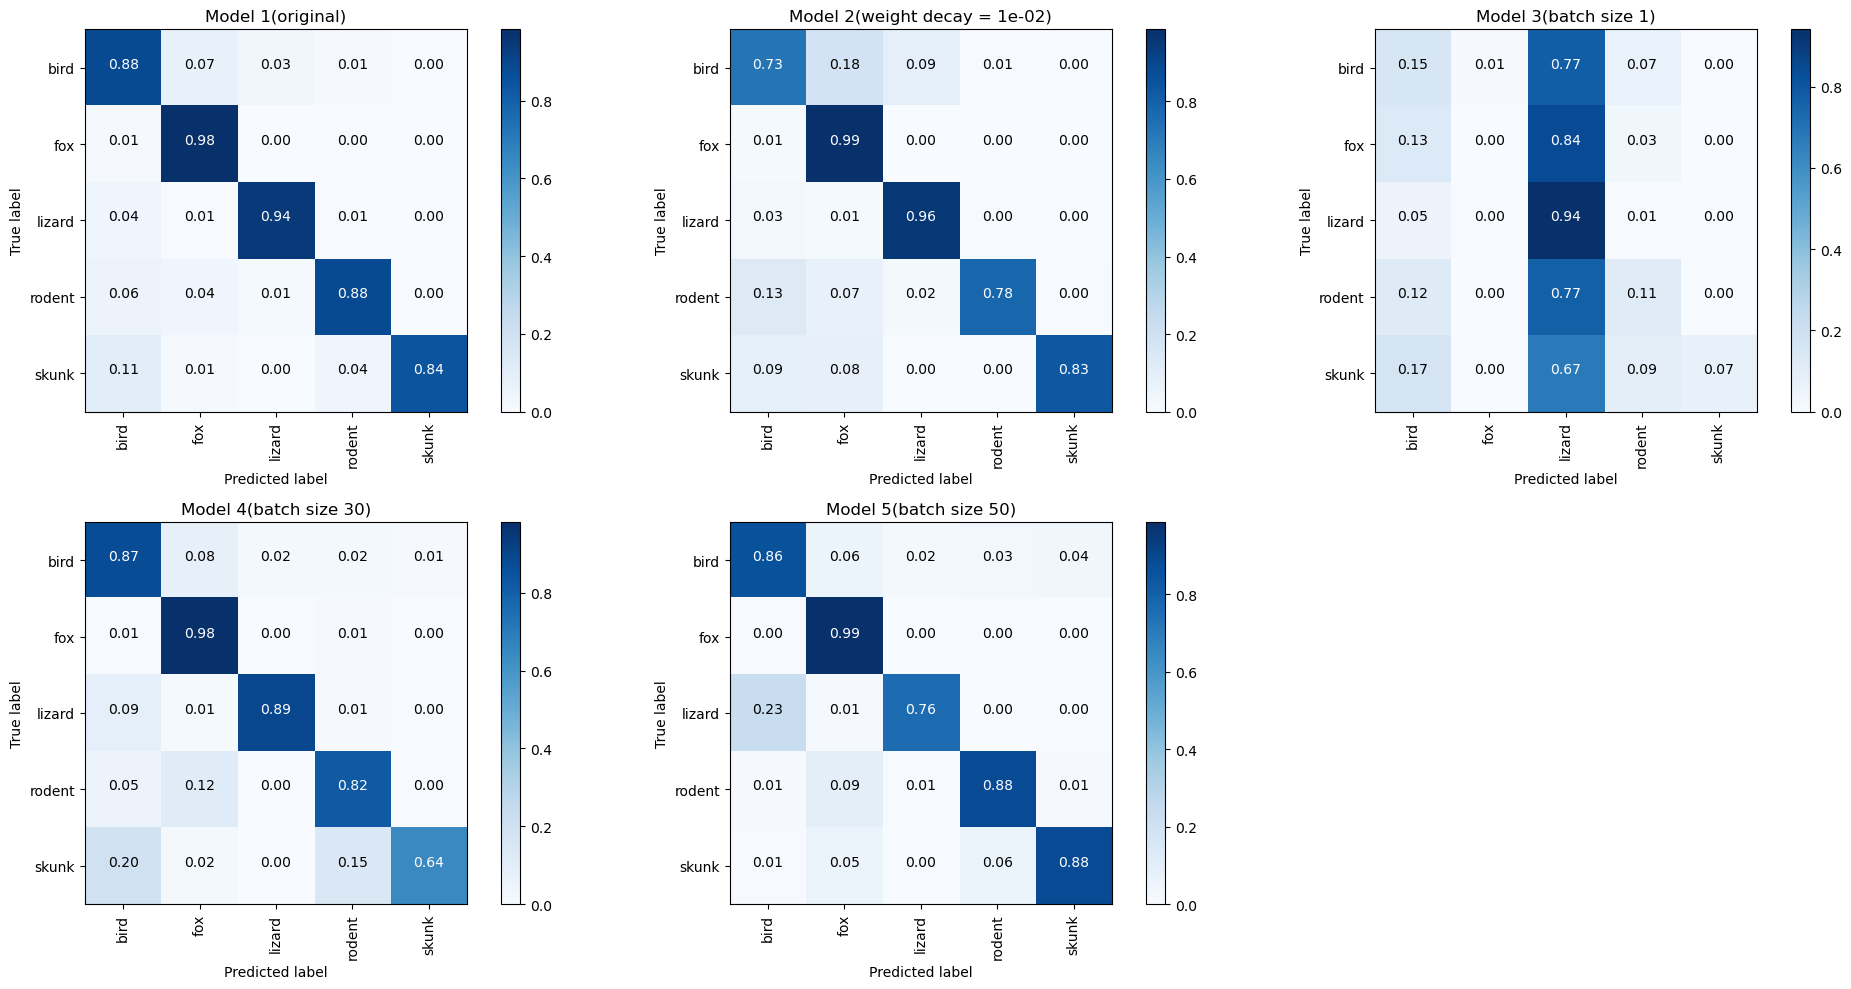

/tmp/ipykernel_523834/1192640313.py:13: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2 * (precision * TP_rate) / (precision + TP_rate) # f1 = 2 * (precision * recall) / (precision + recall)


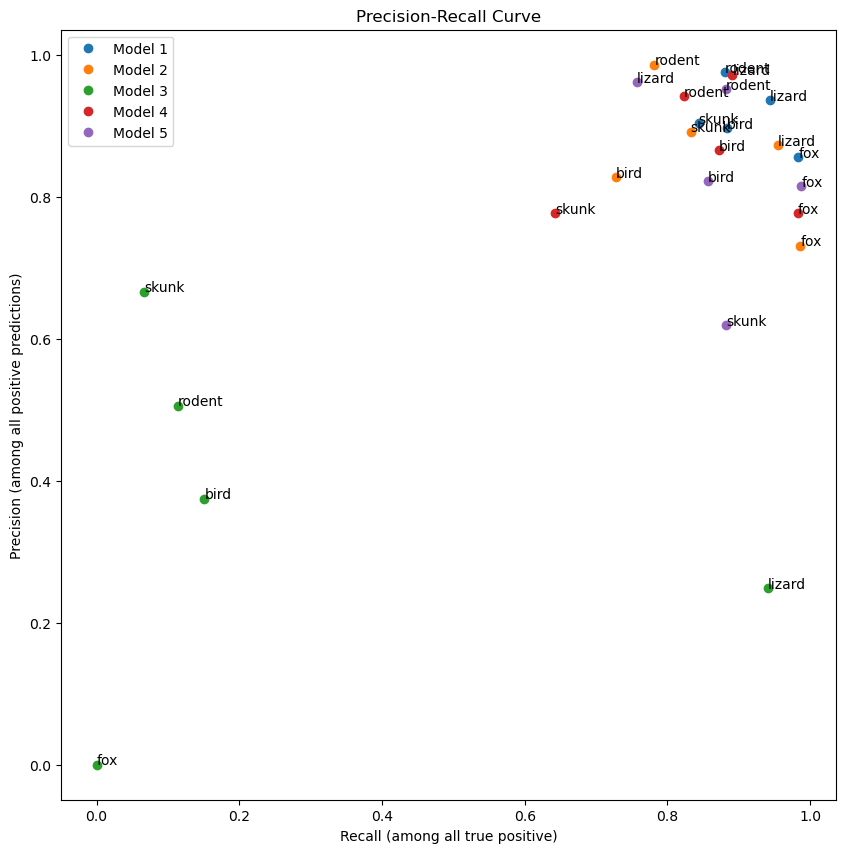

In [ ]:
### Checkpoint 1
### compare mutilple models with different hyperparameters
### compare the performance of the models on the validation set

# plot the confusion matrix
plt.figure(figsize = (20, 10))
ax = plt.subplot(2, 3, 1)
plot_confusion_matrix(df_model1_val, classes=classes, normalize=True ,title = "Model 1(original)")
ax = plt.subplot(2, 3, 2)
plot_confusion_matrix(df_model2_val, classes=classes, normalize=True,title = "Model 2(weight decay = 1e-02)")
ax = plt.subplot(2, 3, 3)
plot_confusion_matrix(df_model3_val, classes=classes, normalize=True,title = "Model 3(batch size 1)")
ax = plt.subplot(2, 3, 4)
plot_confusion_matrix(df_model4_val, classes=classes, normalize=True,title = "Model 4(batch size 30)")
ax = plt.subplot(2, 3, 5)
plot_confusion_matrix(df_model5_val, classes=classes, normalize=True,title = "Model 5(batch size 50)")

plt.tight_layout()




plt.show();

# calculate the precision and recall for each class
precision1, recall1, fpr1, f1_1, fnr1 = precision_recall(df_model1_val)
precision2, recall2, fpr2, f1_2, fnr2 = precision_recall(df_model2_val)
precision3, recall3, fpr3, f1_3, fnr3 = precision_recall(df_model3_val)
precision4, recall4, fpr4, f1_4, fnr4 = precision_recall(df_model4_val)
precision5, recall5, fpr5, f1_5, fnr5 = precision_recall(df_model5_val)

# plot the precision and recall for each class
plt.figure(figsize = (10, 10))
#show all the classes as annotations
plt.plot(recall1, precision1, 'o', label = "Model 1")
plt.plot(recall2, precision2, 'o', label = "Model 2")
plt.plot(recall3, precision3, 'o', label = "Model 3")
plt.plot(recall4, precision4, 'o', label = "Model 4")
plt.plot(recall5, precision5, 'o', label = "Model 5")
for i in range(len(classes)):
    plt.annotate(classes[i], (recall1[i], precision1[i]))
    plt.annotate(classes[i], (recall2[i], precision2[i]))
    plt.annotate(classes[i], (recall3[i], precision3[i]))
    plt.annotate(classes[i], (recall4[i], precision4[i]))
    plt.annotate(classes[i], (recall5[i], precision5[i]))

plt.xlabel("Recall (among all true positive)")
plt.ylabel("Precision (among all positive predictions)")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show();

In [ ]:
fnr = 1 - recall
fnr

array([0.27268409, 0.01399067, 0.04479495, 0.21828454, 0.16759777])

**we care about false negative rate, since we don't want to miss out any non-native species**
- plot ROC curve : The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) of a binary classification model, as the threshold for predicting positive class is varied.

false negative rate = 1 - true positive rate (among all true positive)


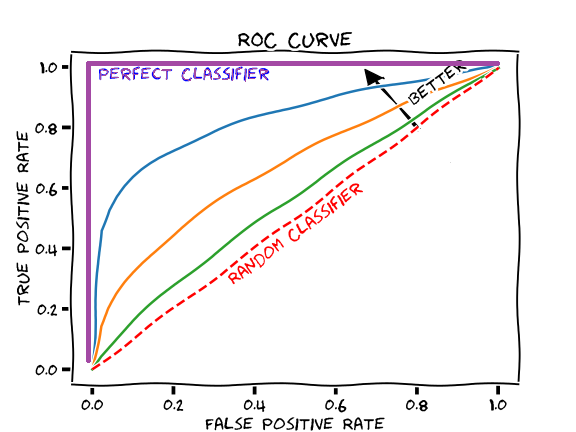

In [ ]:
def ROC_curve(thresholds, data):
    tpr = [1]
    fpr = [1]
    for i in thresholds:
        confusion_matrix_ = confusion_matrix(data['pred'], data['label'])
        
        precision, TP_rate, FP_rate, f1 = precision_recall(confusion_matrix_)
        tpr.append(TP_rate)
        fpr.append(FP_rate)

    # plot the ROC curve using matplotlib
    plt.figure(figsize=(10, 5))
    auc_score = []
    for i in range(data.shape[1] - 2):
        model_data = data.iloc[:, [i+2, 1]]
        model_data.dropna(inplace=True)
        label = model_data.iloc[:, 1]
        score = model_data.iloc[:, 0]
        fpr, tpr, _ = get_ROC_curve(label, score)
        plt.plot(fpr, tpr, label = 'Model {}'.format(i+1))
        auc = 0
        for j in range(len(tpr)-1):
            auc += (tpr[j] + tpr[j+1]) * (fpr[j+1] - fpr[j]) / 2
        auc_score.append(auc)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Class X (Validation)')
    plt.legend()
    plt.show()

    # print the AUC score for each model
    for i in range(len(auc_score)):
        print('AUC for Model {} is {}'.format(i+1, auc_score[i]))
    return auc_score


def get_ROC_curve(label, score):
    n = label.shape[0]
    positive = (label == 1).sum()
    negative = n - positive
    threshold = sorted(score.unique())
    fpr = [0]
    tpr = [0]
    for i in threshold:
        tp = ((label == 1) & (score >= i)).sum()
        fp = ((label == 0) & (score >= i)).sum()
        fn = positive - tp
        tn = negative - fp
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    return fpr, tpr, threshold


### small summary : 
**generally speaking model 1 has the best performance and model 3 has the worst performance**

Model2 : 

Model3 : A high recall and low precision means that the model is able to correctly identify most of the positive examples in the dataset, but it also generates a large number of false positives. 

In [ ]:
df_model1_val 

array([[1859,  147,   72,   21,    6],
       [  16, 1476,    0,    6,    3],
       [  70,   12, 1495,    8,    0],
       [ 109,   87,   29, 1715,    7],
       [  19,    2,    0,    7,  151]])

In [ ]:
def ROC_curve(data, classes):
    tpr = [1]
    fpr = [1]
    for i in np.arange(0, 1, 0.01):        
        _, TP_rate, FP_rate, _ = precision_recall(data)
        tpr.append(TP_rate)
        fpr.append(FP_rate)

    from sklearn.metrics import roc_curve
    plt.figure(figsize=(10, 5))
    auc_score = []
    for i in range(len(classes)):
        _, TP_rate, FP_rate, _ = precision_recall(data)
        plt.plot(FP_rate, TP_rate, label = classes[i])
        auc = 0
        for i in range(len(TP_rate)-1):
            auc += (TP_rate[i] + TP_rate[i+1]) * (FP_rate[i+1] - FP_rate[i]) / 2
        auc_score.append(auc)
    
    # plot the ROC curve using matplotlib
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiple Classes (Validation)')
    plt.legend()
    plt.show();

    
    # print the AUC score for each class
    for i in range(len(classes)):
        print('AUC for class {} is {}'.format(classes[i], auc_score[i]))
    return auc_score



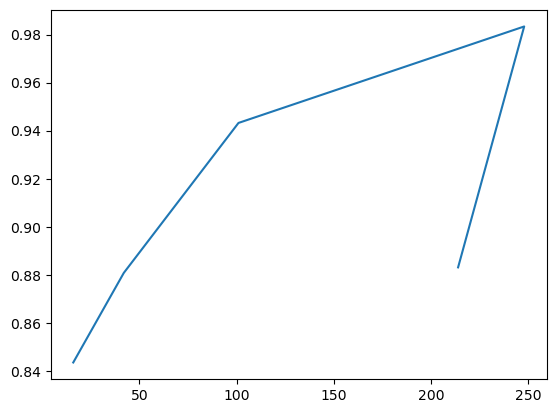

In [ ]:
_, TP_rate, FP_rate, _  = precision_recall(df_model1_val)
plt.plot(FP_rate, TP_rate, label = classes[0])

In [ ]:

def ROC_curve(thresholds, data, classes):
    tpr = [1]
    fpr = [1]
    for i in thresholds:
        confusion_matrix_ = confusion_matrix(data['pred'], data['label'])
        
        precision, TP_rate, FP_rate, f1 = precision_recall(confusion_matrix_)
        tpr.append(TP_rate)
        fpr.append(FP_rate)

        
    from sklearn.metrics import roc_curve
    plt.figure(figsize=(10, 5))
    auc_score = []
    for i in range(len(classes)):
        
        fpr, tpr, _ = roc_curve(data['label'], data.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
        plt.plot(fpr, tpr, label = classes[i])
        auc = 0
        for i in range(len(tpr)-1):
            auc += (tpr[i] + tpr[i+1]) * (fpr[i+1] - fpr[i]) / 2
        auc_score.append(auc)

    # plot the ROC curve using matplotlib
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiple Classes (Validation)')
    plt.legend()
    plt.show()

    #calculate AUC area under curve for each class
    # from sklearn.metrics import auc
    # auc = []
    # for i in range(len(classes)):
    #     fpr, tpr, _ = roc_curve(data['label'], data.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
    #     auc.append(auc(fpr, tpr))
    
    # print the AUC score for each class
    for i in range(len(classes)):
        print('AUC for class {} is {}'.format(classes[i], auc_score[i]))
    return auc_score


Batch size of 1 (Stochastic Gradient Descent)